In [75]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import PyPDF2
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
nlp = spacy.load("en_core_web_sm")

In [77]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Vedant
[nltk_data]     Kesharia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Vedant
[nltk_data]     Kesharia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Vedant
[nltk_data]     Kesharia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [78]:
def preprocess_and_join(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Remove punctuation and lowercase
    tokens = [word.lower() for word in tokens if word.isalpha()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens into a single string
    return ' '.join(tokens)

In [79]:
# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''
        for page in reader.pages:
            text += page.extract_text()
    return text

In [80]:
def extract_text_and_preprocess(pdf_path):
    text = extract_text_from_pdf(pdf_path)
    return preprocess_and_join(text)

In [81]:
def extract_domains(text):
    doc = nlp(text)
    domains = [ent.text for ent in doc.ents if ent.label_ == "DOMAIN"]
    return domains

In [82]:
# def compare_models(model_names):
#     preprocessed_model_names = [simple_preprocess(model) for model in model_names]
#     model = Word2Vec(sentences=preprocessed_model_names, vector_size=100, window=5, min_count=1, workers=4)
#     similarity_matrix = model.wv.similarity_matrix(preprocessed_model_names, negative=[], min_similarity=0.5)
#     return similarity_matrix
def compare_models(model_names):
    model = Word2Vec(sentences=[model_names], vector_size=100, window=5, min_count=1, workers=4)
    similarity_matrix = []
    for model_name1 in model_names:
        similarities = []
        for model_name2 in model_names:
            similarity = model.wv.similarity(model_name1, model_name2)
            similarities.append(similarity)
        similarity_matrix.append(similarities)
    return similarity_matrix


In [83]:
def analyze_similarity(documents):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
    similarity_scores = cosine_similarity(tfidf_matrix)
    return similarity_scores# def analyze_similarity(documents):
#     preprocessed_documents = [preprocess_and_join(text) for text in documents]
#     tfidf_vectorizer = TfidfVectorizer()
#     tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_documents)
#     similarity_scores = cosine_similarity(tfidf_matrix)
#     return similarity_scores



In [84]:
pdf_paths = ["media_to_isl.pdf", "smart_trial.pdf"]

# papers_text = [extract_text_from_pdf(pdf_path) for pdf_path in pdf_paths]
# print(papers_text)
preprocessed_papers_text = [extract_text_and_preprocess(pdf_path) for pdf_path in pdf_paths]
print("Preprocessed Text of Papers:")
print(preprocessed_papers_text)

Preprocessed Text of Papers:
['translating silence medium indian sign language conversion darsh shah dwarkadas sanghvi college engineering mumbai maharashtra chitalia dwarkadas sanghvi college engineering mumbai maharashtra shah dwarkadas sanghvi college engineering mumbai maharashtra machado dwarkadas sanghvi college engineering mumbai maharashtra sweedlemachado abstract problem addressed research paper lack solution converting youtube video indian sign language isl existing solution mainly focus converting video audio text isl targeting youtube content primarily focusing american sign language asl conversion however shortage solution specifically focused isl hence hindering accessibility isl user solution introduces platform facilitating conversion youtube isl highlighting unique need isl user even providing learning opportunity isl platform utilized sigml dataset combine technical innovation approach bridge accessibility gap isl user compared various existing solution platform offer

In [85]:
# preprocessed_papers_text = [preprocess_and_join(text) for text in papers_text]
# print(preprocessed_papers_text)

In [86]:
similarity_scores = analyze_similarity(preprocessed_papers_text)
print("Similarity Scores:")
print(similarity_scores)

Similarity Scores:
[[1.         0.09351707]
 [0.09351707 1.        ]]


In [87]:
extracted_domains = [extract_domains(text) for text in preprocessed_papers_text]
print("Extracted Domains:")
print(extracted_domains)

Extracted Domains:
[[], []]


In [88]:
# Compare models used in projects
model_names = ["spacy","Part-of-Speech tagging","stemming","lemmatization","spacy","deep learning","augmented reality","Generative Adversarial Networks","Semantic Generation Module","Clothes Warping Module,  pix2pixHD"]
similarity_matrix = compare_models(model_names)
print("Similarity Matrix:")
for row in similarity_matrix:
    print(row)

Similarity Matrix:
[1.0, 0.027054898, 0.09291722, 0.016134689, 1.0, -0.059876293, -0.027750358, -0.11167058, -0.052346736, -0.010839172]
[0.027054898, 1.0, -0.14456998, 0.008800998, 0.027054898, 0.060593467, -0.06900182, 0.074989974, 0.19911394, 0.033860337]
[0.09291722, -0.14456998, 1.0, 0.0048424946, 0.09291722, -0.05774583, -0.028491009, -0.013679765, -0.0027540177, -0.11555545]
[0.016134689, 0.008800998, 0.0048424946, 1.0, 0.016134689, 0.019152272, 0.03476493, 0.04157736, 0.14595059, -0.11410723]
[1.0, 0.027054898, 0.09291722, 0.016134689, 1.0, -0.059876293, -0.027750358, -0.11167058, -0.052346736, -0.010839172]
[-0.059876293, 0.060593467, -0.05774583, 0.019152272, -0.059876293, 1.0, 0.13887982, 0.13149004, 0.0640898, 0.00939117]
[-0.027750358, -0.06900182, -0.028491009, 0.03476493, -0.027750358, 0.13887982, 1.0, -0.04461711, 0.17018886, 0.004503023]
[-0.11167058, 0.074989974, -0.013679765, 0.04157736, -0.11167058, 0.13149004, -0.04461711, 1.0, -0.013514934, 0.067975946]
[-0.052346

In [89]:
def calculate_similarity_statistics(similarity_matrix):
    similarity_values = np.array(similarity_matrix).flatten()
    mean_similarity = np.mean(similarity_values)
    max_similarity = np.max(similarity_values)
    min_similarity = np.min(similarity_values)
    return mean_similarity, max_similarity, min_similarity


mean_similarity, max_similarity, min_similarity = calculate_similarity_statistics(similarity_matrix)

print("Mean Similarity:", mean_similarity)
print("Max Similarity:", max_similarity)
print("Min Similarity:", min_similarity)

one_line_summary = f"Overall, the papers exhibit a {mean_similarity*100:.2f}% similarity in content and techniques."

print(one_line_summary)


Mean Similarity: 0.12659407
Max Similarity: 1.0
Min Similarity: -0.14456998
Overall, the papers exhibit a 12.66% similarity in content and techniques.


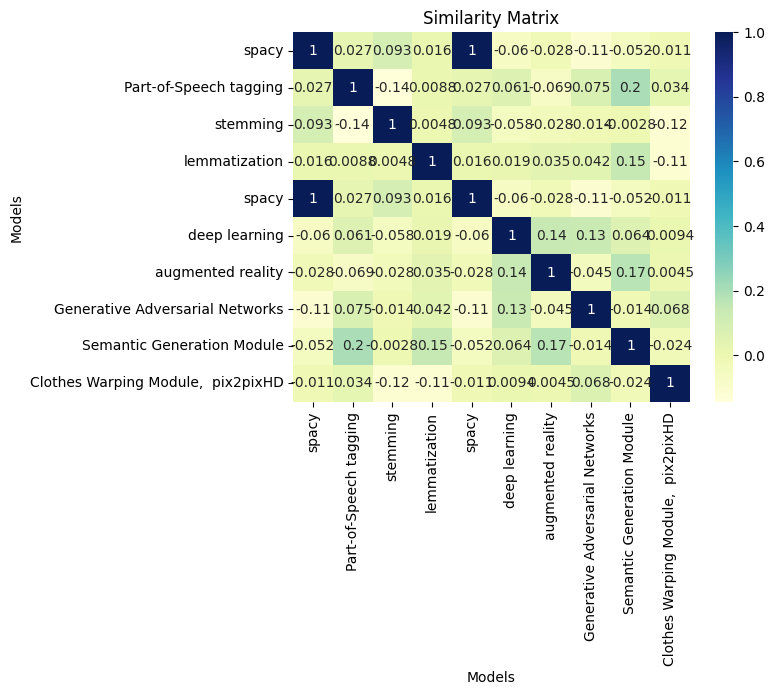

In [90]:
def visualize_similarity_matrix(similarity_matrix):
    sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", xticklabels=model_names, yticklabels=model_names)
    plt.xlabel("Models")
    plt.ylabel("Models")
    plt.title("Similarity Matrix")
    plt.show()


visualize_similarity_matrix(similarity_matrix)


In [91]:
def generate_similarity_summary(similarity_scores, extracted_domains, mean_similarity, max_similarity, min_similarity):

    summary = "Summary of Paper Similarity Analysis:\n\n"
    

    summary += "Similarity Scores between Papers:\n"
    for i in range(len(similarity_scores)):
        summary += f"Similarity Score {i+1}: {similarity_scores[i]}\n"
    summary += "\n"
    

    summary += "Extracted Domains from Papers:\n"
    for i, domains in enumerate(extracted_domains):
        summary += f"Domains in Paper {i+1}: {domains}\n"
    summary += "\n"
    

    summary += "Summary Statistics of Model Similarity:\n"
    summary += f"Mean Similarity: {mean_similarity}\n"
    summary += f"Max Similarity: {max_similarity}\n"
    summary += f"Min Similarity: {min_similarity}\n"
    
    return summary

# Sample data for demonstration
# similarity_scores = [0.5, 0.7]
# extracted_domains = [['Domain A', 'Domain B'], ['Domain B', 'Domain C']]
# mean_similarity = 0.6
# max_similarity = 0.8
# min_similarity = 0.4

# Generate similarity summary
summary = generate_similarity_summary(similarity_scores, extracted_domains, mean_similarity, max_similarity, min_similarity)

# Print the summary
print(summary)


Summary of Paper Similarity Analysis:

Similarity Scores between Papers:
Similarity Score 1: [1.         0.09351707]
Similarity Score 2: [0.09351707 1.        ]

Extracted Domains from Papers:
Domains in Paper 1: []
Domains in Paper 2: []

Summary Statistics of Model Similarity:
Mean Similarity: 0.12659406661987305
Max Similarity: 1.0
Min Similarity: -0.1445699781179428



In [3]:
from sentence_transformers import SentenceTransformer, util
import torch

# Model for sentence embedding
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Function to get sentence embeddings
def get_embedding(sentence):
    embeddings = model.encode(sentence, convert_to_tensor=True)
    return embeddings

# Example paper snippets
paper1 = "This paper investigates a novel approach to machine learning..."
paper2 = "In this work, we propose a new algorithm for natural language processing..."

# Get embeddings for each paper snippet
embedding1 = get_embedding(paper1)
embedding2 = get_embedding(paper2)

# Calculate cosine similarity between embeddings
cosine_similarity = util.pytorch_cos_sim(embedding1, embedding2)

# Print the similarity score (between 0 and 1, higher means more similar)
print("Cosine similarity:", cosine_similarity.item())


Cosine similarity: 0.41258832812309265


In [1]:
import spacy

# Load the English language model for spaCy
nlp = spacy.load("en_core_web_sm")

# Example sentence
example_sentence = "Natural language processing and machine learning are both a small part of artificial intelligence."

# Process the example sentence
doc = nlp(example_sentence)

# Extract entities
entities = [(ent.text, ent.label_) for ent in doc.ents]

print("Entities:", entities)


Entities: []
